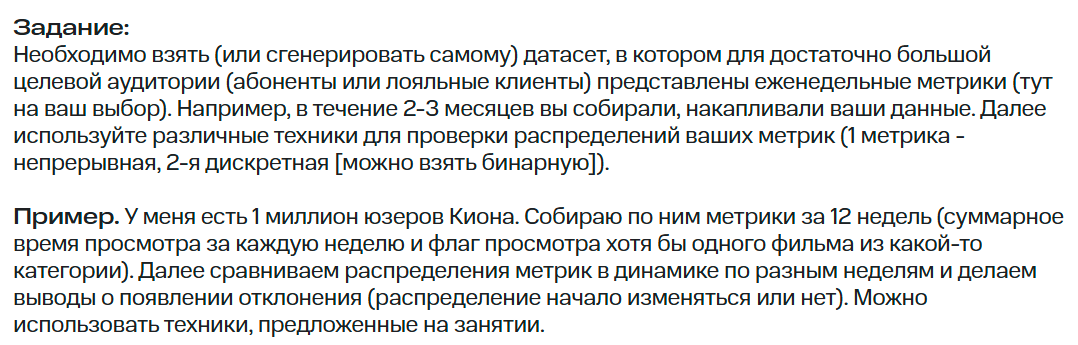

Я решил проанализировать данные с крупного магазина: [ссылка на Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

# Импорт библиотек

In [184]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style('white')
#{darkgrid, whitegrid, dark, white, ticks}

Да, мне пришлось преобразовать данные в excel, так как в csv не хотелось открываться :(

In [185]:
df = pd.read_excel('muda-muda.xlsx')
display(df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [186]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

None

In [187]:
print(df.value_counts('Category'))

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [188]:
print(df.value_counts('Order Date').reset_index().sort_values('Order Date'))

     Order Date  count
1124 2014-01-03      1
989  2014-01-04      3
1156 2014-01-05      1
432  2014-01-06      9
1036 2014-01-07      2
...         ...    ...
800  2017-12-26      4
1029 2017-12-27      2
80   2017-12-28     19
296  2017-12-29     12
595  2017-12-30      7

[1237 rows x 2 columns]


Я решил проанализировать данные с магазина за 4 года (начало 2014 - конец 2017 года) и решил рассмотреть 2 метрики:

* с одинаковой ли частотой люди покупают товары различных категори1 (Category)
* и какой профит (Profit) получил магазин 

Будем рассматривать эти метрики за каждые квариалы, то есть у нас получатся 16 распределения, именно в таком разрезе мы и проанализируем изменение метрик

# Начало анализа

### По кварталам (спойлер, даже по графику видно, что средние значения одинаковые)

In [189]:
df_2014_Q1 = df[(df['Order Date'] >= '2014-01-01') & (df['Order Date'] <= '2014-03-31')]
df_2014_Q2 = df[(df['Order Date'] >= '2014-04-01') & (df['Order Date'] <= '2014-06-30')]
df_2014_Q3 = df[(df['Order Date'] >= '2014-07-01') & (df['Order Date'] <= '2014-09-30')]
df_2014_Q4 = df[(df['Order Date'] >= '2014-10-01') & (df['Order Date'] <= '2014-12-31')]

df_2015_Q1 = df[(df['Order Date'] >= '2015-01-01') & (df['Order Date'] <= '2015-03-31')]
df_2015_Q2 = df[(df['Order Date'] >= '2015-04-01') & (df['Order Date'] <= '2015-06-30')]
df_2015_Q3 = df[(df['Order Date'] >= '2015-07-01') & (df['Order Date'] <= '2015-09-30')]
df_2015_Q4 = df[(df['Order Date'] >= '2015-10-01') & (df['Order Date'] <= '2015-12-31')]

df_2016_Q1 = df[(df['Order Date'] >= '2016-01-01') & (df['Order Date'] <= '2016-03-31')]
df_2016_Q2 = df[(df['Order Date'] >= '2016-04-01') & (df['Order Date'] <= '2016-06-30')]
df_2016_Q3 = df[(df['Order Date'] >= '2016-07-01') & (df['Order Date'] <= '2016-09-30')]
df_2016_Q4 = df[(df['Order Date'] >= '2016-10-01') & (df['Order Date'] <= '2016-12-31')]

df_2017_Q1 = df[(df['Order Date'] >= '2017-01-01') & (df['Order Date'] <= '2017-03-31')]
df_2017_Q2 = df[(df['Order Date'] >= '2017-04-01') & (df['Order Date'] <= '2017-06-30')]
df_2017_Q3 = df[(df['Order Date'] >= '2017-07-01') & (df['Order Date'] <= '2017-09-30')]
df_2017_Q4 = df[(df['Order Date'] >= '2017-10-01') & (df['Order Date'] <= '2017-12-31')]



(-300.0, 300.0)

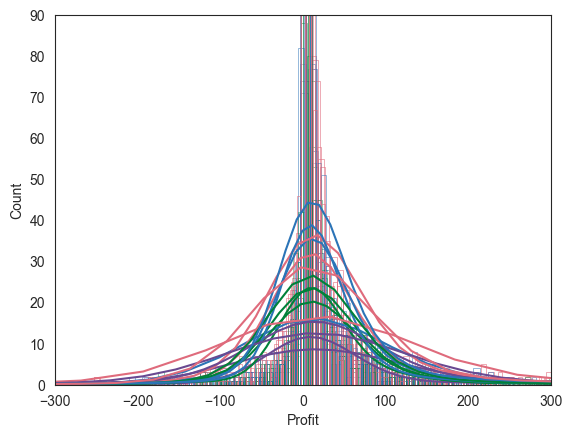

In [190]:
plot_1 = sns.histplot(df_2014_Q1, x = 'Profit', kde = True, label = 'Прибыль за 2014 год', color = '#694991', alpha = 0.4, fill = False)
plot_2 = sns.histplot(df_2014_Q2, x = 'Profit', kde = True, label = 'Прибыль за 2015 год', color = '#008139', alpha = 0.6, fill = False)
plot_3 = sns.histplot(df_2014_Q3, x = 'Profit', kde = True, label = 'Прибыль за 2016 год', color = '#2B74B7', alpha = 0.7, fill = False)
plot_4 = sns.histplot(df_2014_Q4, x = 'Profit', kde = True, label = 'Прибыль за 2017 год', color = '#DF6B7C', alpha = 0.8, fill = False)

plot_5 = sns.histplot(df_2015_Q1, x = 'Profit', kde = True, label = 'Прибыль за 2014 год', color = '#694991', alpha = 0.4, fill = False)
plot_6 = sns.histplot(df_2015_Q2, x = 'Profit', kde = True, label = 'Прибыль за 2015 год', color = '#008139', alpha = 0.6, fill = False)
plot_7 = sns.histplot(df_2015_Q3, x = 'Profit', kde = True, label = 'Прибыль за 2016 год', color = '#2B74B7', alpha = 0.7, fill = False)
plot_8 = sns.histplot(df_2015_Q4, x = 'Profit', kde = True, label = 'Прибыль за 2017 год', color = '#DF6B7C', alpha = 0.8, fill = False)


plot_9 = sns.histplot(df_2016_Q1, x = 'Profit', kde = True, label = 'Прибыль за 2014 год', color = '#694991', alpha = 0.4, fill = False)
plot_10 = sns.histplot(df_2016_Q2, x = 'Profit', kde = True, label = 'Прибыль за 2015 год', color = '#008139', alpha = 0.6, fill = False)
plot_11 = sns.histplot(df_2016_Q3, x = 'Profit', kde = True, label = 'Прибыль за 2016 год', color = '#2B74B7', alpha = 0.7, fill = False)
plot_12 = sns.histplot(df_2016_Q4, x = 'Profit', kde = True, label = 'Прибыль за 2017 год', color = '#DF6B7C', alpha = 0.8, fill = False)

plot_13 = sns.histplot(df_2017_Q1, x = 'Profit', kde = True, label = 'Прибыль за 2014 год', color = '#694991', alpha = 0.4, fill = False)
plot_13 = sns.histplot(df_2017_Q2, x = 'Profit', kde = True, label = 'Прибыль за 2015 год', color = '#008139', alpha = 0.6, fill = False)
plot_14 = sns.histplot(df_2017_Q3, x = 'Profit', kde = True, label = 'Прибыль за 2016 год', color = '#2B74B7', alpha = 0.7, fill = False)
plot_15 = sns.histplot(df_2017_Q4, x = 'Profit', kde = True, label = 'Прибыль за 2017 год', color = '#DF6B7C', alpha = 0.8, fill = False)



plt.ylim(0, 90)
plt.xlim(-300, 300)

Так как выборок у нас очень много, то я принял решение провести анализ среди годов, так как там выборок и поменьше и тесты получатся более точными

### По годам

In [191]:
df_1 = df[df['Order Date'] <= '2014-12-31']

df_2 = df[
    (df['Order Date'] >= '2015-01-01') & (df['Order Date'] <= '2015-12-31')
]

df_3 = df[
    (df['Order Date'] >= '2016-01-01') & (df['Order Date'] <= '2016-12-31')
]

df_4 = df[
    (df['Order Date'] >= '2017-06-01') & (df['Order Date'] <= '2017-12-31')
]


## Анализ чистой прибыли (Profit)

(0.0, 87.0)

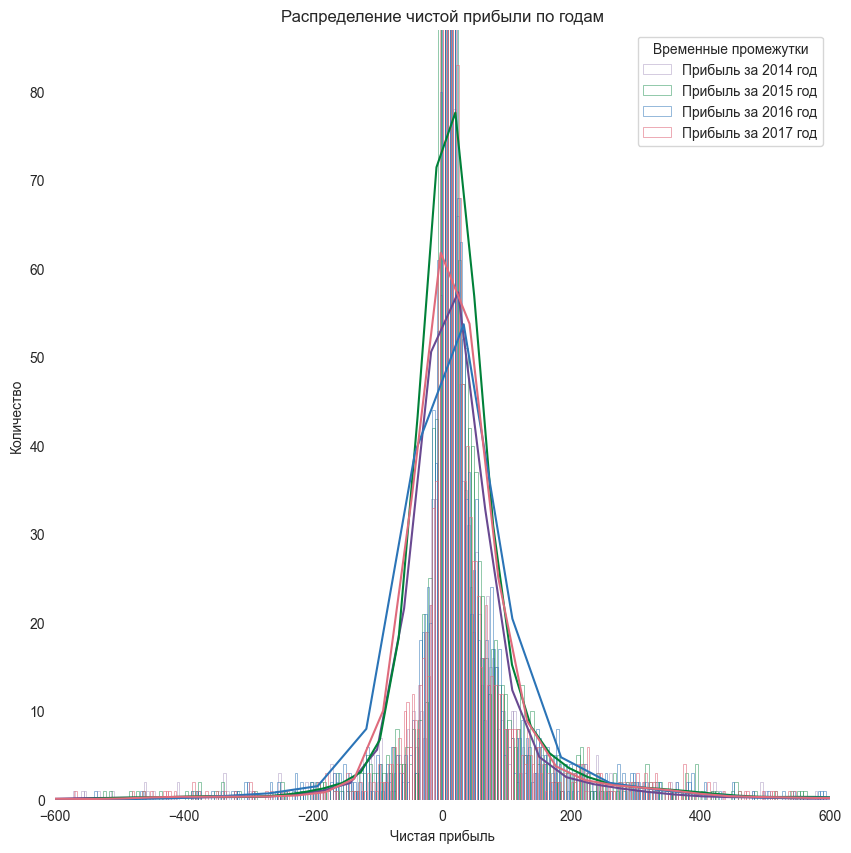

In [192]:
plt.figure(figsize=(10, 10))
plot_1 = sns.histplot(df_1, x = 'Profit', kde = True, label = 'Прибыль за 2014 год', color = '#694991', alpha = 0.4, fill = False)
plot_2 = sns.histplot(df_2, x = 'Profit', kde = True, label = 'Прибыль за 2015 год', color = '#008139', alpha = 0.6, fill = False)
plot_3 = sns.histplot(df_3, x = 'Profit', kde = True, label = 'Прибыль за 2016 год', color = '#2B74B7', alpha = 0.7, fill = False)
plot_4 = sns.histplot(df_4, x = 'Profit', kde = True, label = 'Прибыль за 2017 год', color = '#DF6B7C', alpha = 0.8, fill = False)
plt.legend(title = 'Временные промежутки')
plt.box(False)
plt.ylabel('Количество')
plt.xlabel('Чистая прибыль')
plt.title('Распределение чистой прибыли по годам')
plt.xlim(-600, 600)
plt.ylim(0, 87)

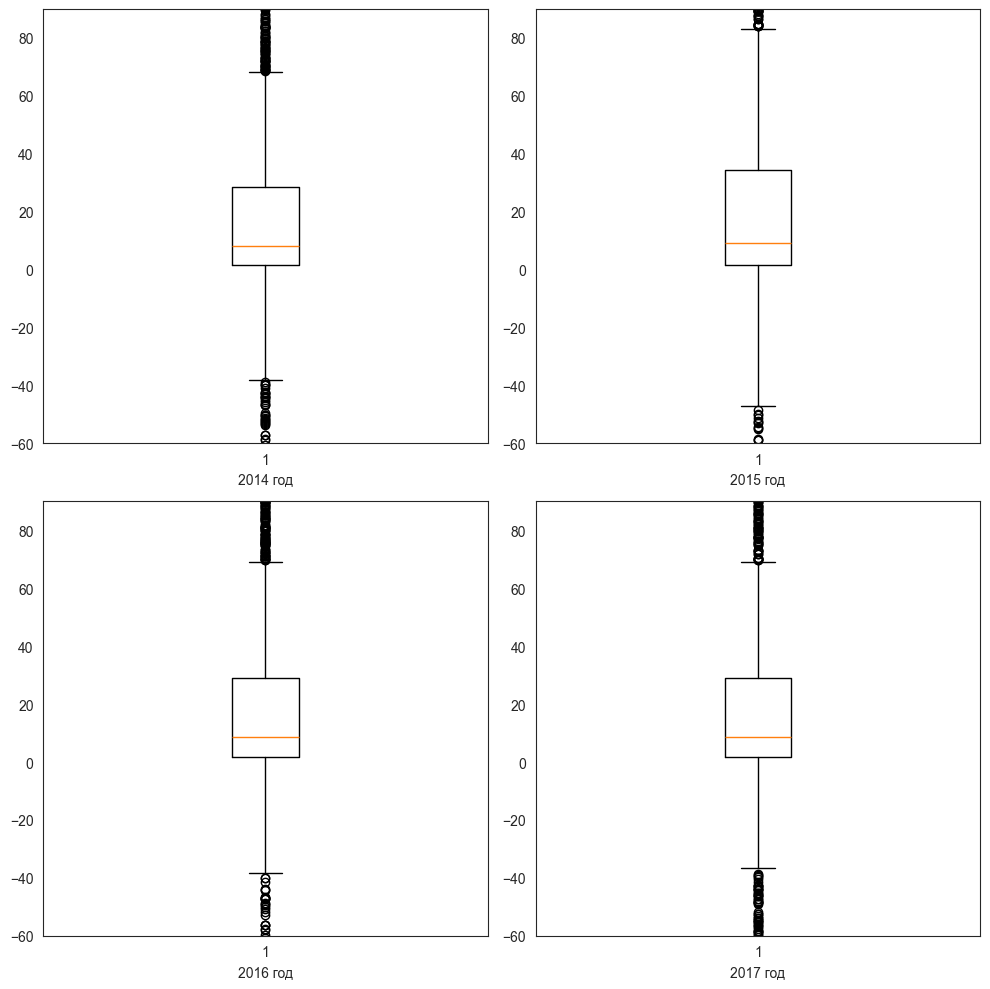

In [193]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0, 0].boxplot(df_1['Profit'], meanline= False)
ax[0, 0].set_ylim(-60, 90)
ax[0, 0].set_xlabel('2014 год')

ax[0, 1].boxplot(df_2['Profit'], meanline= False)
ax[0, 1].set_ylim(-60, 90)
ax[0, 1].set_xlabel('2015 год')

ax[1, 0].boxplot(df_3['Profit'], meanline= False)
ax[1, 0].set_ylim(-60, 90)
ax[1, 0].set_xlabel('2016 год')


ax[1, 1].boxplot(df_4['Profit'], meanline= False)
ax[1, 1].set_ylim(-60, 90)
ax[1, 1].set_xlabel('2017 год')

plt.tight_layout()

Наши данные похожи на нормальное распределение, как мне кажется, давайте проверим это, построив QQ-plot и выполнив тест Шапиро-Уилка (для проверки на нормальность)

Text(0.5, 1.0, 'Прибыль за 2017 год')

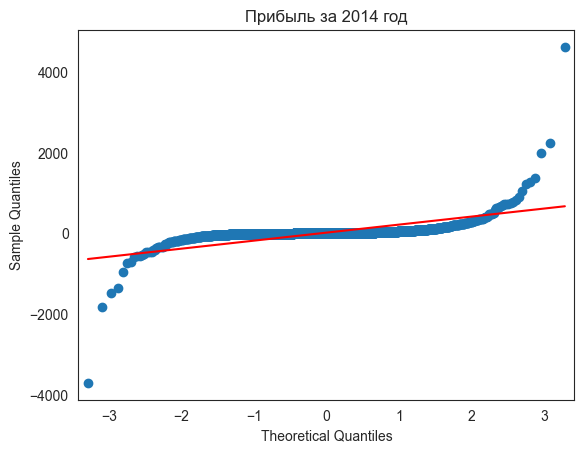

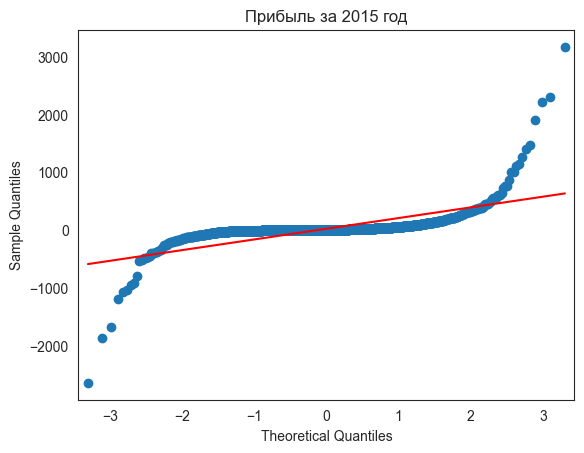

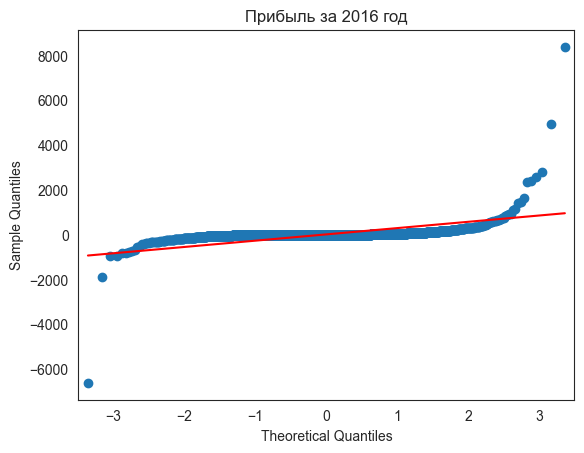

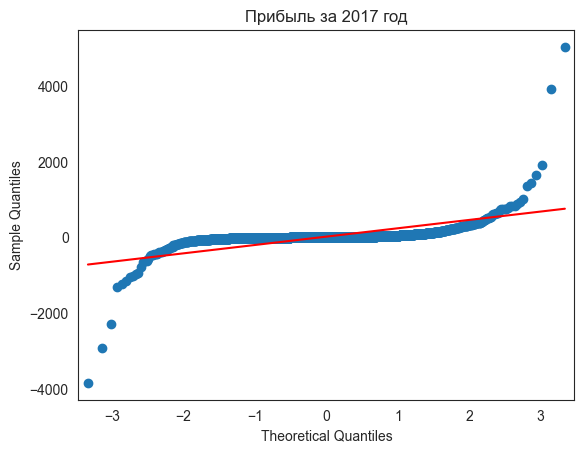

In [194]:
sm.qqplot(df_1['Profit'], line = 's')
plt.title('Прибыль за 2014 год')
sm.qqplot(df_2['Profit'], line = 's')
plt.title('Прибыль за 2015 год')
sm.qqplot(df_3['Profit'], line = 's')
plt.title('Прибыль за 2016 год')
sm.qqplot(df_4['Profit'], line = 's')
plt.title('Прибыль за 2017 год')

In [195]:
stat1, p_val1 = sts.shapiro(df_1['Profit'])
stat2, p_val2 = sts.shapiro(df_2['Profit'])
stat3, p_val3 = sts.shapiro(df_3['Profit'])
stat4, p_val4 = sts.shapiro(df_4['Profit'])

print('P-value для профита 2014 года:', p_val1)
print('P-value для профита 2015 года:', p_val2)
print('P-value для профита 2016 года:', p_val3)
print('P-value для профита 2017 года:', p_val4)

P-value для профита 2014 года: 1.7665598817615875e-65
P-value для профита 2015 года: 1.1185741593792868e-64
P-value для профита 2016 года: 1.8734866112030575e-74
P-value для профита 2017 года: 8.781062470346718e-70


Да, все таки p-value у нас намного меньше 0.05, значит, мы с большой уверенностью можем говорить о том, что наши данные распределены не нормально

Так как у нас > 2 распределений, то предлагаю поступить следующим образом: через непараметрический аналог теста ANOVA сравнить наши 4 выборки, а затем, для бОльшей уверенности -- провести попарный тест Манна-Уитни

Давайте сначла проведем тест Левена, чтобы узнать, одинаковые ли дисперсии у наших данных

In [196]:
stat, p_val = sts.levene(df_1['Profit'], df_2['Profit'], df_3['Profit'], df_4['Profit'])
print('P-value для дисперсий у 4 выборок: ', p_val)

P-value для дисперсий у 4 выборок:  0.9372411012324512


Как видно, у нас p-value намного больше 0.05, даже почти 1, то могу с уверенностью сказать, что у нас дисперсии гомоскедастичны, то есть одинаковые

С учетом этого, проводим тест Крускала-Уоллиса, чтобы узнать, совпадают ли медианы у наших выборок

In [197]:
stat1, p_val1 = sts.kruskal(df_1['Profit'], df_2['Profit'], df_3['Profit'], df_4['Profit'])
print('P-value для медиан 4 выборок: ', p_val)

P-value для медиан 4 выборок:  0.9372411012324512


Что могу сказаать? У нас p-value почти 1, а это говорит нам только о том, что медианные значения у нас почти равны друг другу. И правда, если взглянуть на гистограмму (kde), то можно увидеть, что они все пости сосредоточены в одном месте. Также это говорит нам о том, что распределения **не отличаются друг от друга**

Можно построить бутстрап, чтобы удостовериться, что у нас доверительные интервалы принадлежат одному промежутку

Левая граница ДИ для медианного профита 2014 года: 7.2036
Правая граница ДИ для медианного профита 2014 года: 9.072
----------------------------------------------------------------------------------------------------
Левая граница ДИ для медианного профита 2015 года: 8.47179
Правая граница ДИ для медианного профита 2015 года: 10.3071
----------------------------------------------------------------------------------------------------
Левая граница ДИ для медианного профита 2016 года: 8.2062
Правая граница ДИ для медианного профита 2016 года: 9.3906
----------------------------------------------------------------------------------------------------
Левая граница ДИ для медианного профита 2017 года: 7.85
Правая граница ДИ для медианного профита 2017 года: 9.0912


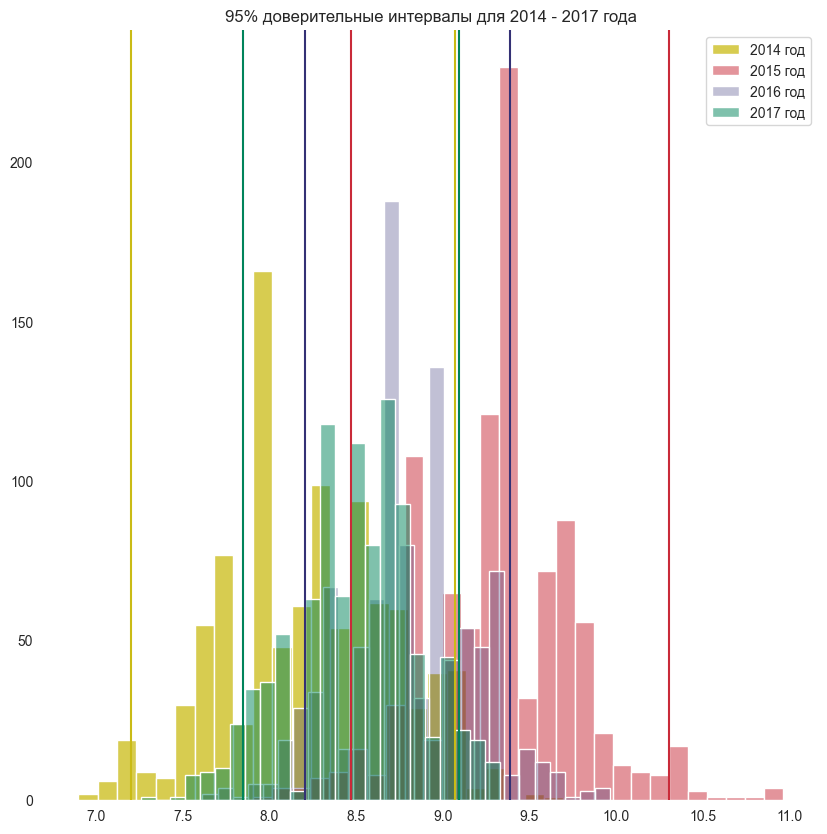

In [198]:
# 95 % ДИ = 97.5 перцентиль - 2.5 перцентиль

df_1_bootstrap_profit = []

for i in range(1000):
    df_1_bootstrap_median_i = np.median(np.random.choice(df_1['Profit'], len(df_1)))
    df_1_bootstrap_profit.append(df_1_bootstrap_median_i)


left_df_1 = np.percentile(df_1_bootstrap_profit, 2.5)
print(f'Левая граница ДИ для медианного профита 2014 года: {left_df_1}')

right_df_1 = np.percentile(df_1_bootstrap_profit, 97.5)
print(f'Правая граница ДИ для медианного профита 2014 года: {right_df_1}')

print('-' * 100)

df_2_bootstrap_profit = []

for i in range(1000):
    df_2_bootstrap_median_i = np.median(np.random.choice(df_2['Profit'], len(df_2)))
    df_2_bootstrap_profit.append(df_2_bootstrap_median_i)


left_df_2 = np.percentile(df_2_bootstrap_profit, 2.5)
print(f'Левая граница ДИ для медианного профита 2015 года: {left_df_2}')

right_df_2 = np.percentile(df_2_bootstrap_profit, 97.5)
print(f'Правая граница ДИ для медианного профита 2015 года: {right_df_2}')

print('-' * 100)

df_3_bootstrap_profit = []

for i in range(1000):
    df_3_bootstrap_median_i = np.median(np.random.choice(df_3['Profit'], len(df_3)))
    df_3_bootstrap_profit.append(df_3_bootstrap_median_i)


left_df_3 = np.percentile(df_3_bootstrap_profit, 5)
print(f'Левая граница ДИ для медианного профита 2016 года: {left_df_3}')

right_df_3 = np.percentile(df_3_bootstrap_profit, 95)
print(f'Правая граница ДИ для медианного профита 2016 года: {right_df_3}')

print('-' * 100)

df_4_bootstrap_profit = []

for i in range(1000):
    df_4_bootstrap_median_i = np.median(np.random.choice(df_4['Profit'], len(df_4)))
    df_4_bootstrap_profit.append(df_4_bootstrap_median_i)


left_df_4 = np.percentile(df_4_bootstrap_profit, 5)
print(f'Левая граница ДИ для медианного профита 2017 года: {left_df_4}')

right_df_4 = np.percentile(df_4_bootstrap_profit, 95)
print(f'Правая граница ДИ для медианного профита 2017 года: {right_df_4}')

plt.figure(figsize = (10, 10))
plt.title('95% доверительные интервалы для 2014 - 2017 года')

sns.histplot(df_1_bootstrap_profit, color = '#CABB15', label = '2014 год')
plt.axvline(left_df_1, color = '#CABB15')
plt.axvline(right_df_1, color = '#CABB15')

sns.histplot(df_2_bootstrap_profit, color = '#C92A39', label = '2015 год', alpha = 0.5)
plt.axvline(left_df_2, color = '#C92A39')
plt.axvline(right_df_2, color = '#C92A39')

sns.histplot(df_3_bootstrap_profit, color = '#343175', label = '2016 год', alpha = 0.3)
plt.axvline(left_df_3, color = '#343175')
plt.axvline(right_df_3, color = '#343175')

sns.histplot(df_4_bootstrap_profit, color = '#00845B', label = '2017 год', alpha = 0.5)
plt.axvline(left_df_4, color = '#00845B')
plt.axvline(right_df_4, color = '#00845B')

plt.ylabel('')
plt.box(False)
plt.legend()

### Общий итог по Profit за 4 года

**Наша медианная чистая прибыль за 4 года не поменялась**

## Анализ дискретной метрики, _Category_

Теперь проанализируем метрику Category и поймем, с одинаковой ли частотой/вероятностью у нас попадаются категории

In [199]:
display(df['Category'])

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: Category, Length: 9994, dtype: object

In [200]:
display(df_1['Category'].value_counts())
display(df_2['Category'].value_counts())
display(df_3['Category'].value_counts())
display(df_4['Category'].value_counts())


Category
Office Supplies    1217
Furniture           421
Technology          355
Name: count, dtype: int64

Category
Office Supplies    1241
Furniture           452
Technology          409
Name: count, dtype: int64

Category
Office Supplies    1566
Furniture           562
Technology          459
Name: count, dtype: int64

Category
Office Supplies    1419
Furniture           501
Technology          447
Name: count, dtype: int64

In [201]:
table = np.array([[1217, 421, 355],
                  [1241, 452, 409],
                  [1566, 562, 459],
                  [1419, 501, 447]])


stat = sts.chi2_contingency(table)
print(f'Pvalue для теста Кси-квадрат: {stat[1]}')



Pvalue для теста Кси-квадрат: 0.7312557452337654


Как видно, у нас pvalue >> 0.05, а это значит, что наша гипотеза о том, что частоты категорий равны оказалась верной, то есть люди в динамике за 4 года с примерно одинаковой частотой покупали товары разных категорий

Также проведем Bootsrap, чтобы точно убедиться в достоверности нашего теста

In [202]:
print(f'Оригинальная статистика ODS: {stat[0]}')

bootstrap_sample = []

for _ in range(1000):
    boot_table = np.zeros_like(table)
    for i, row in enumerate(table):
        total = row.sum() 
        probs = row / total
        boot_table[i] = np.random.multinomial(total, probs)

    bootstrap_sample.append(sts.chi2_contingency(boot_table)[0])

left_line = np.percentile(bootstrap_sample, 2.5)
right_line = np.percentile(bootstrap_sample, 97.5)

print(f'Левая граница 95% ДИ для ODS: {left_line}')
print(f'Правая граница 95% ДИ для ODS: {right_line}')


Оригинальная статистика ODS: 3.5952592927913485
Левая граница 95% ДИ для ODS: 1.977659958360407
Правая граница 95% ДИ для ODS: 20.73055840417871


Как видно, наш ODS входит в Доверительный Интервал (ДИ), а значит, можно сделать вывод о том, что наш тест показал результаты кооректно)

### Общий итог по Category за 4 года

**Частота покупки товаров из различных категорий (Office Supplies, Furniture и Technology) не отличаются**